![title](UCN ICI.png)

 #  <font color= #007FFF> Regresion Tree </font>

<div class="alert alert-info"> </h4> **Material preparado para el Master en Ingeniería Civil Industrial | Universidad Católica del Norte | Antofasta | Curso - Predictive Analytics.**
</h4> </div>

In [1]:
# Importando las librerias que utilizaremos:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn

In [2]:
df = pd.read_csv('Regresion_basic.csv',index_col=['Id'] )
print("La forma del archivo es: "+str(df.shape))
df.head() # Cuando son muchos datos puede imprimirse usando df.head()

La forma del archivo es: (100, 6)


,Cpl,Dist,LdTime,TrlLng,Wgt,Equpt
Id,,,,,,
1,3692,1579,1,53,20559,DRY
2,3279,1298,12,48,17025,REF
3,3120,1382,11,48,26735,DRY
4,3205,1033,1,53,26175,DRY
5,3188,1320,3,53,17994,DRY


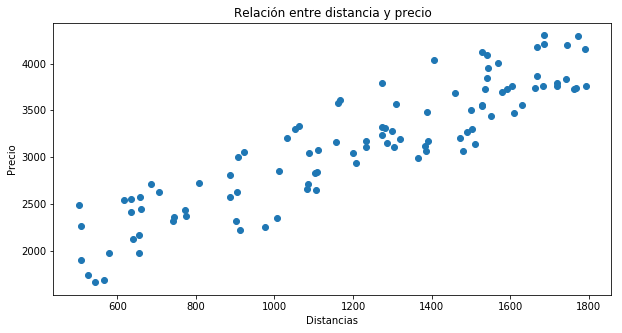

In [3]:
plt.figure(figsize=(10,5))
plt.scatter(df['Dist'],df['Cpl'])
plt.xlabel("Distancias")
plt.ylabel("Precio")
plt.title("Relación entre distancia y precio")
plt.show()

 #  <font color= #007FFF> 1.- Data Preparation </font>

In [4]:
dummy=df['Equpt'].str.get_dummies()
dummy.head()

,DRY,REF
Id,,
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0


In [5]:
df.drop(['Equpt'],axis=1,inplace=True)
df.head()

,Cpl,Dist,LdTime,TrlLng,Wgt
Id,,,,,
1,3692,1579,1,53,20559
2,3279,1298,12,48,17025
3,3120,1382,11,48,26735
4,3205,1033,1,53,26175
5,3188,1320,3,53,17994


In [6]:
DataFrame=pd.concat([df, dummy.reindex(df.index)], axis=1)
DataFrame.head()

,Cpl,Dist,LdTime,TrlLng,Wgt,DRY,REF
Id,,,,,,,
1,3692,1579,1,53,20559,1,0
2,3279,1298,12,48,17025,0,1
3,3120,1382,11,48,26735,1,0
4,3205,1033,1,53,26175,1,0
5,3188,1320,3,53,17994,1,0


In [7]:
# Valores X and Valores Y
Y=DataFrame['Cpl']
X=DataFrame.drop(['Cpl'],axis=1,inplace=False)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

 #  <font color= #007FFF> 2.- Modelo </font>

In [9]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
regression = model.fit(X, Y)

regression.predict([[1045, 2,58,20564,0,1]])

array([ 3330.])

In [10]:
predict=regression.predict(x_test.values)
predict

array([ 4006.,  1979.,  3120.,  3046.,  2252.,  2715.,  3565.,  2549.,
        2545.,  3330.,  2631.,  3830.,  3729.,  3560.,  2434.,  3547.,
        2217.,  2573.,  3576.,  3486.])

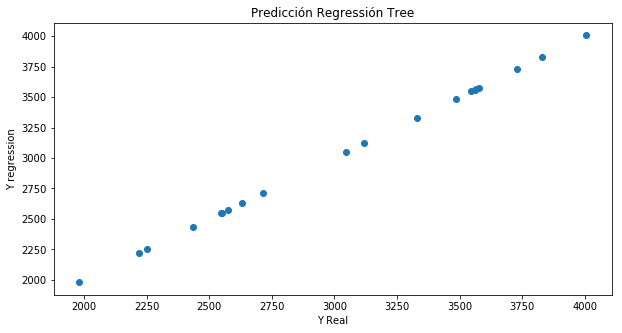

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,predict)
plt.xlabel("Y Real")
plt.ylabel("Y regression")
plt.title("Predicción Regressión Tree")
plt.show()

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

accuracy=accuracy_score(y_test,predict)
precision=precision_score(y_test,predict,average='micro')

print(" La exactitud del modelo es ",accuracy)
print(" La precisión del modelo es ",precision)

 La exactitud del modelo es  1.0
 La precisión del modelo es  1.0
